### Задание:
Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика

In [52]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,9

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
climate_data = pd.read_csv('climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv')

In [3]:
climate_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1838-04-01,13.008,2.586,Afghanistan
1,1838-05-01,NaN,NaN,Afghanistan
2,1838-06-01,23.950,2.510,Afghanistan
3,1838-07-01,26.877,2.883,Afghanistan
4,1838-08-01,24.938,2.992,Afghanistan


In [4]:
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574223 entries, 0 to 574222
Data columns (total 4 columns):
dt                               574223 non-null object
AverageTemperature               541645 non-null float64
AverageTemperatureUncertainty    542384 non-null float64
Country                          574223 non-null object
dtypes: float64(2), object(2)
memory usage: 17.5+ MB


### Описание базы: 
в файле GlobalLandTemperaturesByCountry.csv данные о средней температуре по стране на 1 число каждого месяца c 1812 по 2013 год. Так как в ранних дынных много пропусков, оставим данные с 1980 года

In [120]:
climate_data = climate_data[climate_data['dt'] >= '1980-01-01']
climate_data = climate_data.reset_index(drop=True)
climate_data.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1980-01-01,0.533,0.650,Afghanistan
1,1980-02-01,2.050,0.473,Afghanistan
2,1980-03-01,8.180,0.235,Afghanistan
3,1980-04-01,17.357,0.200,Afghanistan
4,1980-05-01,21.573,0.319,Afghanistan


In [108]:
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98010 entries, 0 to 98009
Data columns (total 4 columns):
dt                               98010 non-null object
AverageTemperature               97385 non-null float64
AverageTemperatureUncertainty    97789 non-null float64
Country                          98010 non-null object
dtypes: float64(2), object(2)
memory usage: 3.0+ MB


## График 1:
### Динамика средней температуры во Франции зимой (дек, янв, фев) и летом (июнь, июль, авг).
Для этого используем библиотеку Matplotlib

In [109]:
def select_months(row):
    month = ['01', '02', '12', '06', '07', '08']
    date = row['dt']
    date = date.strip().split('-')
    if date[1] in month:
        return row
    
def summer_winter(row):
    winter = ['01', '02', '12']
    summer = ['06', '07', '08']
    date = row['dt']
    date = date.strip().split('-')
    if date[1] in winter:
        return "winter"
    elif date[1] in summer:
        return "summer"

In [110]:
def only_years(row):
    year = row['dt']
    year = year.strip().split('-')
    return year[0]

In [111]:
france = climate_data[(climate_data['Country'] == 'France')].apply(select_months, axis=1)
france = france.dropna().reset_index(drop=True)
france['season'] = france.apply(summer_winter, axis=1)
france.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,season
0,1980-01-01,5.942,0.232,France,winter
1,1980-02-01,9.473,0.184,France,winter
2,1980-06-01,16.735,0.224,France,summer
3,1980-07-01,17.888,0.264,France,summer
4,1980-08-01,19.763,0.250,France,summer
5,1980-12-01,6.356,0.220,France,winter
6,1981-01-01,6.725,0.257,France,winter
7,1981-02-01,6.248,0.211,France,winter
8,1981-06-01,17.505,0.330,France,summer
9,1981-07-01,18.613,0.295,France,summer


In [112]:
france['year'] = france.apply(only_years, axis=1)

france = france.drop(columns=['dt', 'AverageTemperatureUncertainty', 'Country'])

In [113]:
france.head(10)

,AverageTemperature,season,year
0,5.942,winter,1980
1,9.473,winter,1980
2,16.735,summer,1980
3,17.888,summer,1980
4,19.763,summer,1980
5,6.356,winter,1980
6,6.725,winter,1981
7,6.248,winter,1981
8,17.505,summer,1981
9,18.613,summer,1981


In [116]:
france_dynamics = france.groupby(['year', 'season']).mean()[['AverageTemperature']]
france_dynamics.head(9)

AverageTemperature
year season                    
1980 summer           18.128667
     winter            7.257000
1981 summer           18.618000
     winter            6.891000
1982 summer           19.659667
     winter            8.303000
1983 summer           20.551000
     winter            7.416000
1984 summer           18.954667

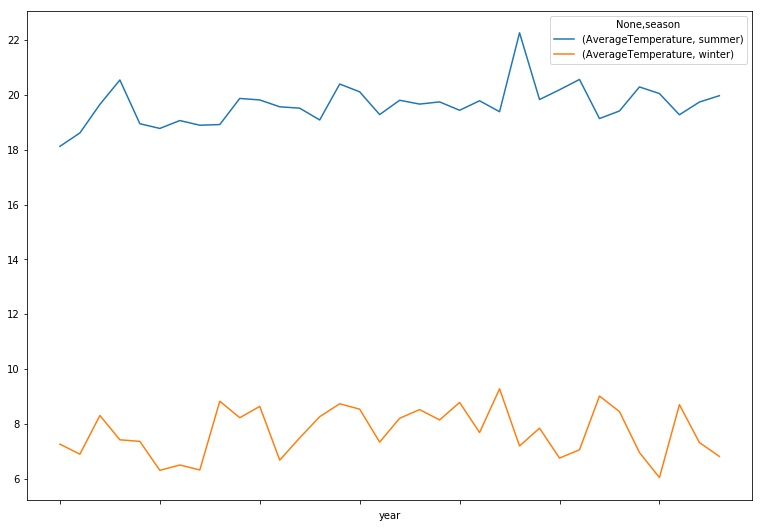

In [115]:
france_dynamics.unstack('season').plot()

## Вывод:

Из графика видно, что колебания средней температуры зимой и летом не имеют одинаковой динамики и не колеблются сонарпавленно. Зимой динамика колебаний средней температуры за сезон выше, чем летом. Амплитуда колебаний примерно равна: в пределах 3-4 градусов. За период в 33 года динамики по повышению средней температуры за сезон не видно - графики не имеют ни восходящей, ни нисходящей динамики

## График 2:
### Сравнение макс и мин температуры за каждый год во Франции, представленное в bar chart.
Для этого используем библиотеку Matplotlib

In [55]:
france_2 = climate_data[(climate_data['Country'] == 'France')]

In [56]:
france_2['year'] = france_2.apply(only_years, axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
france_2 = france_2.drop(columns=['dt', 'AverageTemperatureUncertainty', 'Country'])

In [58]:
france_2 = france_2.dropna().reset_index(drop=True)

In [59]:
france_2 = france_2.groupby('year').agg(['min', 'max'])['AverageTemperature']
france_2.head()

,min,max
year,,
1980,5.942,19.763
1981,6.248,19.736
1982,8.100,21.028
1983,6.111,22.746
1984,6.805,19.985


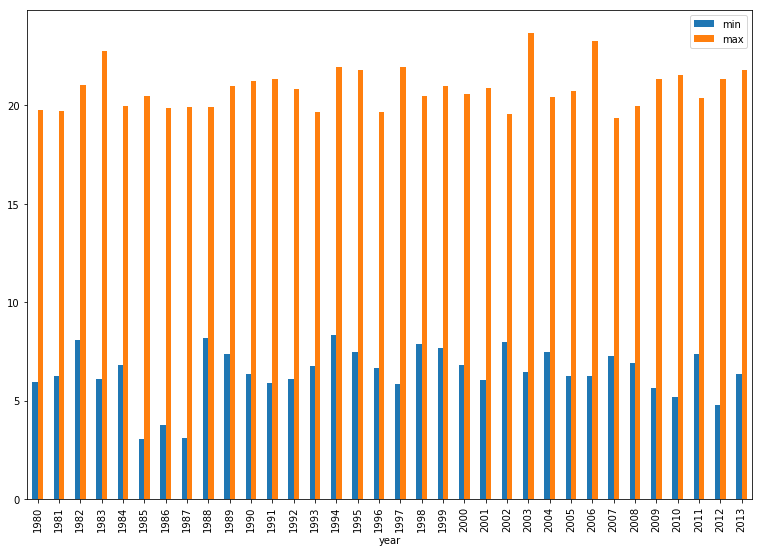

In [60]:
france_2.plot(kind='bar')

## Вывод:

Из графика видно, минимальная и максимальная средняя температура по Франции в году имеют различную динамику за последние 33 года. Год с минимальной температурой - 1985 и 1987 - в районе 2-3 градусов выше 0. Максимальной температура была в 2003 и 2006 году - около 23-24 градусов. Нельзя сделать вывод, что с каждым годом ставятся новые температурные рекорды, также нет восходящей либо нисходящей динамики.

## График 3:
### Найдем максимальную и минимальную температуру для каждого месяца во Франции за рассматриваемый период с 1980 по 2013 год.
Используем библиотеку Matplotlib

In [101]:
france_3 = climate_data[(climate_data['Country'] == 'France')]

In [102]:
def only_months(row):
    month = row['dt']
    month = month.strip().split('-')
    return month[1]

In [103]:
france_3['month'] = france_3.apply(only_months, axis=1)

france_3 = france_3.drop(columns=['dt', 'AverageTemperatureUncertainty', 'Country'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
france_3 = france_3.dropna().reset_index(drop=True)

In [105]:
france_3 = france_3.groupby('month').agg(['min', 'max'])['AverageTemperature']
france_3

,min,max
month,,
01,3.045,9.595
02,3.771,11.502
03,8.461,12.176
04,9.940,15.478
05,12.848,17.354
06,16.735,21.682
07,17.888,23.295
08,18.740,23.662
09,15.751,19.521


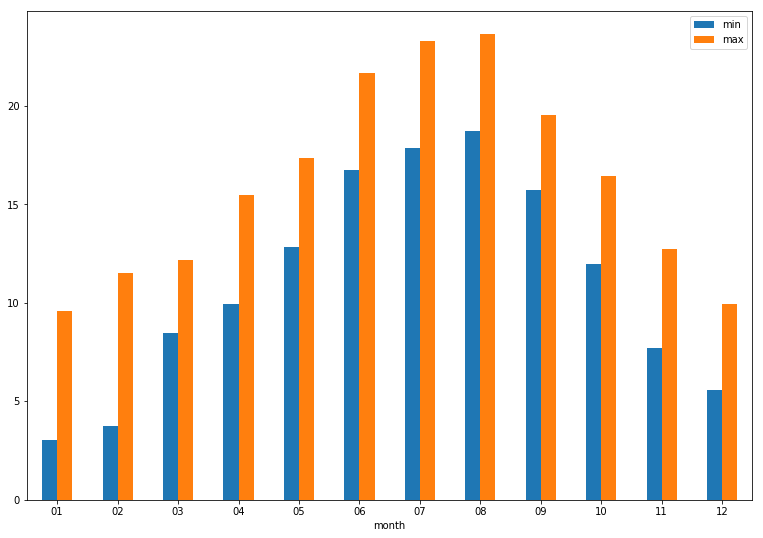

In [106]:
france_3.plot(kind='bar', rot=0, stacked=False)

## Вывод:

График показывает, насколько отличалась максимальная и минимальная температура за период в 33 года в каждый месяц. Видно, что самые большие перепады могут происходить в зимние месяцы: в январе и феврале разница достигает 10 градусов. В остальное время это менее заметно

## График 4:
### С помощью графика boxplot посмотрим на распределение температуры зимой и какие есть выбросы
Используем библиотеку Seaborn

In [158]:
france_4 = climate_data[(climate_data['Country'] == 'France')].apply(select_months, axis=1)
france_4 = france_4.dropna().reset_index(drop=True)
france_4['season'] = france_4.apply(summer_winter, axis=1)
france_4['year'] = france_4.apply(only_years, axis=1)
france_4 = france_4.drop(columns=['dt', 'AverageTemperatureUncertainty', 'Country'])
france_4.head(10)

,AverageTemperature,season,year
0,5.942,winter,1980
1,9.473,winter,1980
2,16.735,summer,1980
3,17.888,summer,1980
4,19.763,summer,1980
5,6.356,winter,1980
6,6.725,winter,1981
7,6.248,winter,1981
8,17.505,summer,1981
9,18.613,summer,1981


In [159]:
# france_4 = france_4.groupby(['season', 'year']).mean()[['AverageTemperature']].sort_values(by='AverageTemperature')

In [121]:
sns.set(style="whitegrid")

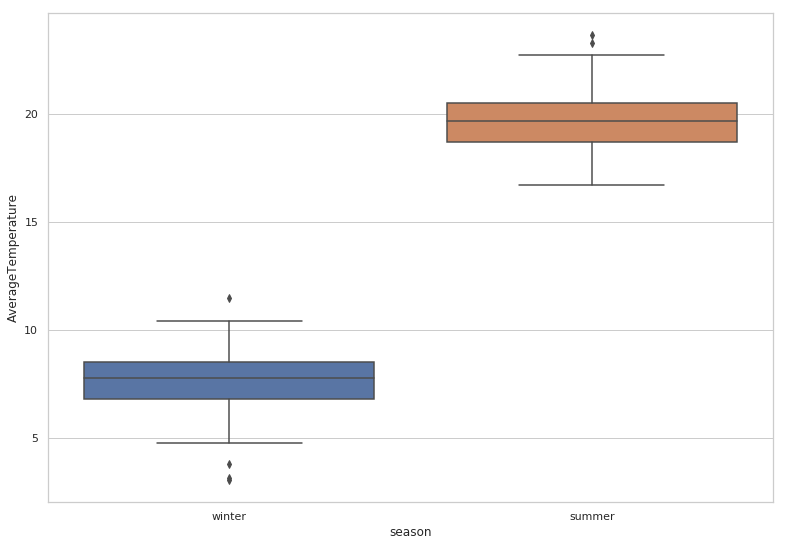

In [161]:
sns.boxplot(x='season', y='AverageTemperature', data=france_4)

## Вывод:

На графике хорошо видно, что вне зависимости от сезона температурные значения сгруппированы плотною. Процентили Q1 и Q3 находятся близко к моде. Разброс точек, как видно по усам, также не очень большой. Выбросов немного: 3 для зимы и 2 для лета, а это говорит о том, что за 33 года было 2 наиболее холодных зимы, 1 наиболее теплая зима и 2 наиболее теплых лета

## График 5:
### Выявим корреляцию температуры в период с 1980 по 2013 в странах из одного и разных полушарий: Франции и Аргентины vs Франции и Германии
Используем библиотеку Seaborn, графики pairplot и jointplot

In [207]:
france_5 = climate_data[(climate_data['Country'] == 'France')]
france_5 = france_5.dropna().reset_index(drop=True)
france_5 = france_5.drop(columns=['AverageTemperatureUncertainty', 'Country'])
france_5.columns = ['dt', 't_France']
france_5.head(10)

,dt,t_France
0,1980-01-01,5.942
1,1980-02-01,9.473
2,1980-03-01,9.363
3,1980-04-01,11.179
4,1980-05-01,14.213
5,1980-06-01,16.735
6,1980-07-01,17.888
7,1980-08-01,19.763
8,1980-09-01,18.036
9,1980-10-01,12.911


In [208]:
argentina = climate_data[(climate_data['Country'] == 'Argentina')]
argentina = argentina.dropna().reset_index(drop=True)
argentina = argentina.drop(columns=['AverageTemperatureUncertainty', 'Country'])
argentina.columns = ['dt', 't_Argentina']

In [217]:
germany = climate_data[(climate_data['Country'] == 'Germany')]
germany = germany.dropna().reset_index(drop=True)
germany = germany.drop(columns=['AverageTemperatureUncertainty', 'Country'])
germany.columns = ['dt', 't_Germany']

In [220]:
france_argentina = france_5.merge(argentina, on='dt', how='inner')
france_argentina.head()

,dt,t_France,t_Argentina
0,1980-01-01,5.942,22.248
1,1980-02-01,9.473,20.916
2,1980-03-01,9.363,20.614
3,1980-04-01,11.179,14.630
4,1980-05-01,14.213,12.252


In [221]:
france_germany = france_5.merge(germany, on='dt', how='inner')
france_germany.head()

,dt,t_France,t_Germany
0,1980-01-01,5.942,-2.852
1,1980-02-01,9.473,2.181
2,1980-03-01,9.363,3.398
3,1980-04-01,11.179,6.138
4,1980-05-01,14.213,10.819


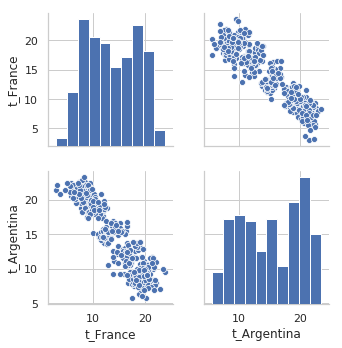

In [222]:
sns.pairplot(france_argentina[['t_France', 't_Argentina']]);

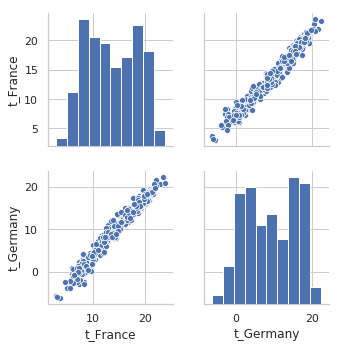

In [223]:
sns.pairplot(france_germany[['t_France', 't_Germany']]);

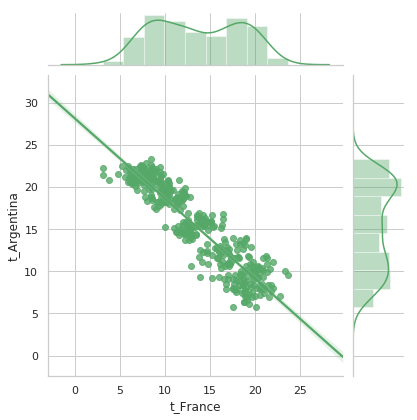

In [226]:
sns.jointplot(x='t_France', y='t_Argentina', data=france_argentina, kind='reg', color="g")

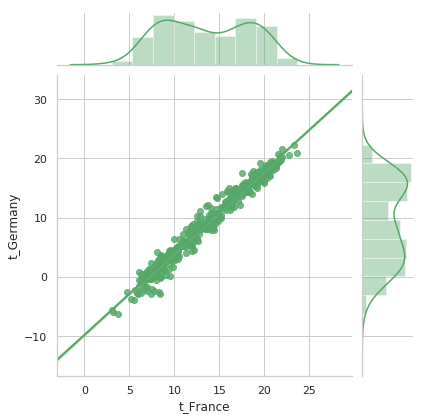

In [227]:
sns.jointplot(x='t_France', y='t_Germany', data=france_germany, kind='reg', color="g")

## Вывод:

Сравнивая 2 графика видно, что полушарие (а именно положение а разных точках долготы планеты), в котором находится страна сильно влияет на график температуры. Так сравнивая графики температур 2 стран можно предположить, в одном они полушарии или в разных. На графиках pairplot и jointplot видно, что у Франции и Аргентины отрицательный коэффициент корреляции и отрицательный угол наклона прямой. У Франции и Германии наоборот: угол наклона положительный, а коэффициент близок к 1 - значит климат стран примерно одинаковый.